In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Normalizer
import warnings
from google.colab import drive
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
import pickle

In [4]:
drive.mount('/content/drive')

X_train = pd.read_csv('/content/drive/MyDrive/Data Mining/X_train.csv')
X_test = pd.read_csv('/content/drive/MyDrive/Data Mining/X_test.csv')
y_train = pd.read_csv('/content/drive/MyDrive/Data Mining/y_train.csv')
y_test = pd.read_csv('/content/drive/MyDrive/Data Mining/y_test.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
y_train = y_train.iloc[:, 1]
y_test = y_test.iloc[:, 1]
X_train = X_train.iloc[:, 1:]
X_test = X_test.iloc[:, 1:]

In [6]:
# instantiate the model
gnb = GaussianNB()

In [7]:
# fit the model
gnb.fit(X_train, y_train)
#plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, s=50, cmap='RdBu')
#lim = plt.axis()

GaussianNB()

In [8]:
y_pred = gnb.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [9]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.7638


###Confusion Matrix

In [10]:
confusionMatrix = confusion_matrix(y_test, y_pred)

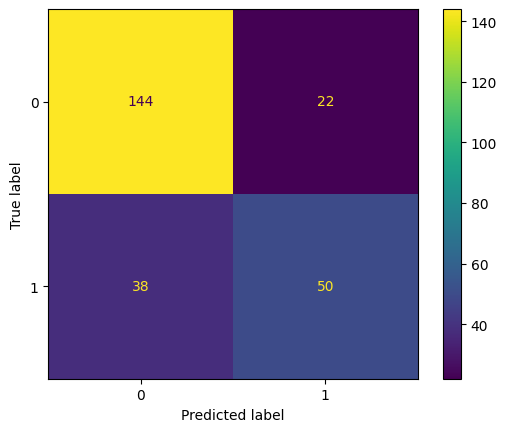

In [11]:
ConfusionMatrixDisplay(confusionMatrix).plot()

In [12]:
accuracy_score(y_test, y_pred)

0.7637795275590551

In [13]:
precision_score(y_test, y_pred)


0.6944444444444444

In [14]:
recall_score(y_test, y_pred)

0.5681818181818182

In [15]:
f1_score(y_test, y_pred)

0.625

In [16]:
NB_y_proba = gnb.predict_proba(X_test)[:,1]

In [17]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, NB_y_proba)

In [18]:
print('roc_auc_score for Naive Bayes: ', roc_auc_score(y_test, NB_y_proba))

roc_auc_score for Naive Bayes:  0.8231790799561883


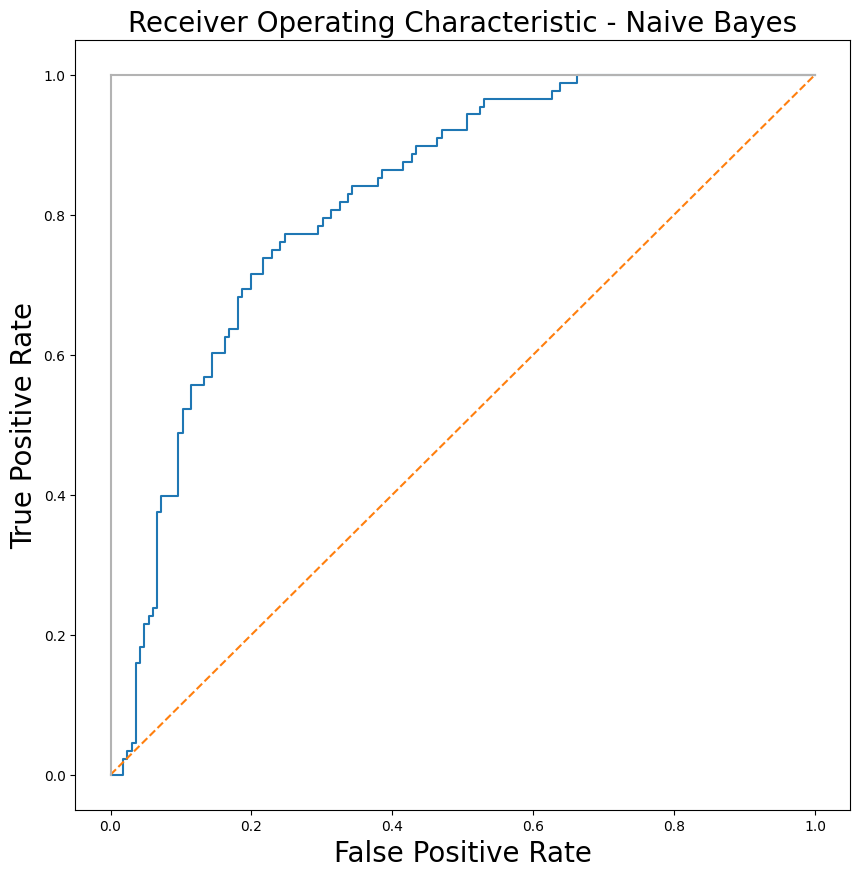

In [26]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Naive Bayes', fontsize=20)
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate', fontsize=20)
plt.xlabel('False Positive Rate', fontsize=20)
plt.show()

In [20]:
%cd /content/drive/My\ Drive\/Data Mining/

/content/drive/My Drive/Data Mining


In [21]:
file= 'model.pkl'

In [22]:
pickle.dump(gnb, open(file, 'wb'))

In [23]:
load_model = pickle.load(open(file, 'rb'))

In [24]:
data = [[5, 148, 72, 35, 0, 32, 0.627, 50]]
  
# Create the pandas DataFrame with column name is provided explicitly
df = pd.DataFrame(data, columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [25]:
load_model.predict(df)

array([1])